# <center>Is home court advantage real?
#### <center> By: Radman Tavakoli, Yao(Chengyuan) Yao, Rehan Mondal , Parham Alijani





## <center> Introduction

Home court advantage in sports is the idea of having a slight edge over your opponent due to playing on your home floor, whether this may be because of comfort of the hardwood and rims, or the comfort of sleeping the night before in your own home and driving your own car to the arena throughout the same highway you take everyday, or simply psychological effects. In the NBA (National Basketball Association), a controversial topic has been regarding home court advantage and whether or not teams are impacted by it. Teams play 50% of their regular season games at home, and those who qualify to the playoffs play multiple best of 7 series where the team with the higher seed (better Win-Loss Record) will have 4 out of the 7 games on their home court. The question that we will try to answer is, does home court advantage truly exist? Using a representative sample created from the nba stats website that contains information about nba games since 2004, we will make inferences on future NBA matches with the same rules and showcase whether or not the home team has an advantage. To do this, we will compare the proportion of wins at home vs away with our sample, and make a conclusion on whether or not the proportion of wins at home is significant enough for us to fail to reject the null hypothesis.


## <center> Preliminary Data

In [1]:
# loading libraries
#library(cowplot)
# library(digest)
# library(gridExtra)
library(infer)
library(repr)
library(tidyverse)
library(rsample)

# library(datateachr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# reading data and convert it to a dataframe
games <- read_csv("https://raw.githubusercontent.com/rehan13/STAT-201-PROJECT/main/games.csv") %>% 
    as.data.frame()
head(games, 4)
colnames(games)
games %>% nrow()

Rows: 25796 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): GAME_STATUS_TEXT
dbl  (19): GAME_ID, HOME_TEAM_ID, VISITOR_TEAM_ID, SEASON, TEAM_ID_home, PTS...
date  (1): GAME_DATE_EST

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,⋯,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
,<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104,0.398,0.760,⋯,23,53,1610612750,113,0.422,0.875,0.357,21,46,0
2,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101,0.443,0.933,⋯,20,46,1610612739,91,0.419,0.824,0.208,19,40,1
3,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108,0.412,0.813,⋯,28,52,1610612754,119,0.489,1.000,0.389,23,47,0
4,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122,0.484,0.933,⋯,33,55,1610612749,109,0.413,0.696,0.386,27,39,1


[1] "GAME_DATE_EST"    "GAME_ID"          "GAME_STATUS_TEXT" "HOME_TEAM_ID"    
 [5] "VISITOR_TEAM_ID"  "SEASON"           "TEAM_ID_home"     "PTS_home"        
 [9] "FG_PCT_home"      "FT_PCT_home"      "FG3_PCT_home"     "AST_home"        
[13] "REB_home"         "TEAM_ID_away"     "PTS_away"         "FG_PCT_away"     
[17] "FT_PCT_away"      "FG3_PCT_away"     "AST_away"         "REB_away"        
[21] "HOME_TEAM_WINS"

[1] 25796

we are interested in knowing whether home teams win more often through knowing the score difference of home and away team for every game.
TODO: explain how we split the data randomly in half and have a sample of size 25796 with even number of home and away team game observations.

In [11]:
# obtain columns of interest for calculating proportion of winning when home vs away
# Storing game winning status for every game being the home team
home_games <- games %>%
    summarize(
        type = "home",
        win = as.character(HOME_TEAM_WINS)
    )
# Storing game winning status for every game being the away team
away_games <- games %>%
    summarize(
        type = "away",
        win = as.character(abs(1-HOME_TEAM_WINS))
    )
# Combining all home and away game observations
sample_for_prop <- rbind(home_games, away_games)


sample_for_mean_diff <- games %>%
    filter(!is.na(PTS_home), !is.na(PTS_away)) %>%
    summarize(
        point_diff = PTS_home - PTS_away
    )

head(sample_for_prop)
head(sample_for_mean_diff)

,type,win
,<chr>,<chr>
1,home,0
2,home,1
3,home,0
4,home,1
5,home,0
6,home,1


,point_diff
,<dbl>
1,-9
2,10
3,-11
4,13
5,-12
6,9


In [16]:
set.seed(111)
null_distribution_prop <- sample_for_prop %>% 
  specify(formula = win ~ type, success = "1")  %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 500, type = "permute") %>% 
  calculate(stat = "diff in props", order = c("home", "away"))
head(null_distribution_prop)



replicate,stat
<int>,<dbl>
1,-0.000775314
2,-0.005659792
3,-0.009691425
4,0.003721507
5,0.005039541
6,0.001783222


In [17]:
set.seed(111)
null_distribution_mean_diff <- sample_for_mean_diff %>% 
  specify(response = point_diff)  %>% 
  hypothesize(null = "point", mu=0) %>% 
  generate(reps = 1000, type = "bootstrap") %>% 
  calculate(stat = "mean")
head(null_distribution_mean_diff)

replicate,stat
<int>,<dbl>
1,-0.04206717
2,-0.06347044
3,-0.11911896
4,0.03229949
5,-0.09666498
6,0.15488189


In [14]:
# Calculating the observed difference in proportion
obs_diff_prop <- sample_for_prop %>% 
  specify(win ~ type, success = "1") %>% 
  calculate(stat = "diff in props", order = c("home", "away"))
obs_diff_prop
# Calculating the observed mean
obs_mean_diff <- sample_for_mean_diff %>% 
  specify(response = point_diff) %>% 
  calculate(stat = "mean")
obs_mean_diff

stat
<dbl>
0.1749884


stat
<dbl>
2.811924


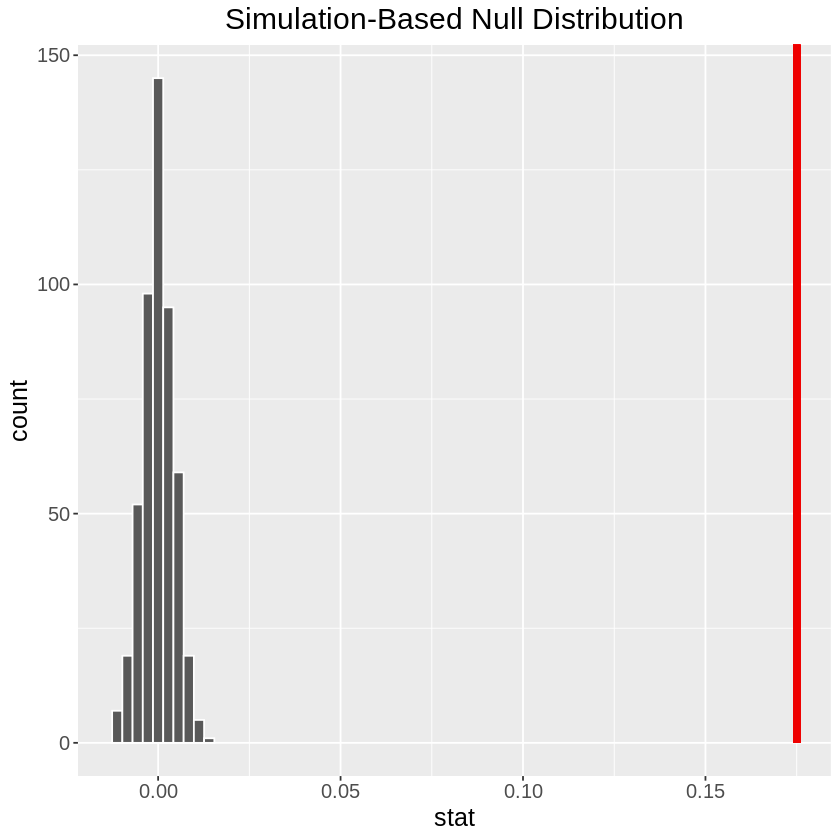

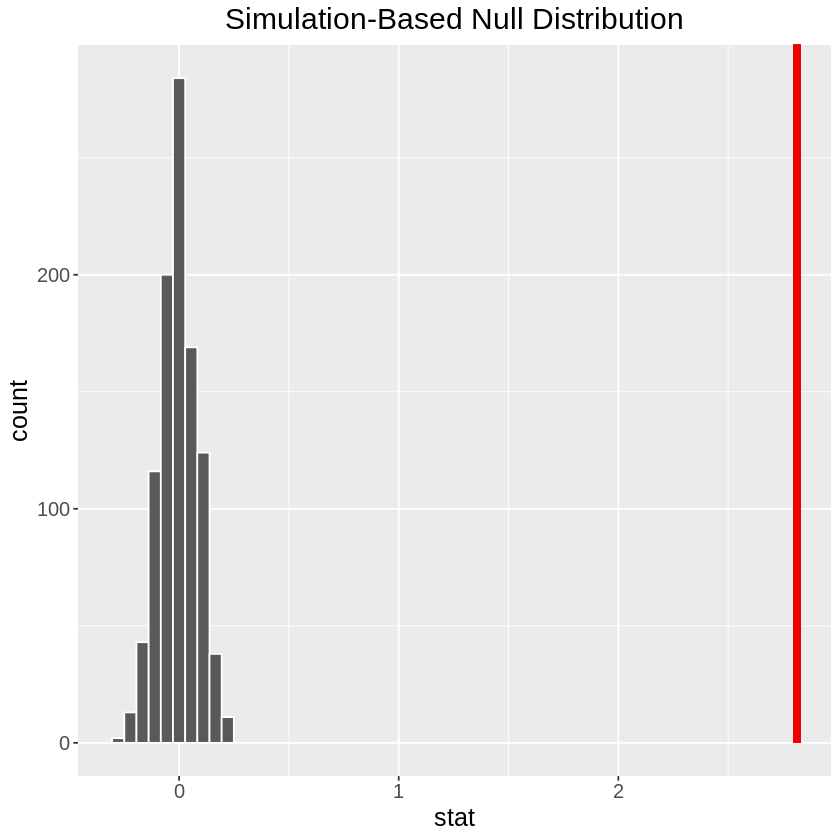

In [15]:
visualize(null_distribution_prop, bins = 10) + 
  shade_p_value(obs_stat = obs_diff_prop, direction = "right")+
  theme(text = element_text(size = 15), plot.title = element_text(hjust = 0.5))
visualize(null_distribution_mean_diff, bins = 10) + 
  shade_p_value(obs_stat = obs_mean_diff, direction = "right")+
  theme(text = element_text(size = 15), plot.title = element_text(hjust = 0.5))

## <center> Methods

In this project we will hypthesize and find out if home teams have an actual adavantage in their home court games. Since the data that is accessible to us is not the entire population we will use bootstrapping to create a distribution that will dipict the true population. As we will create the bootstrap distribution, we will try and get the standard error down to a minimum and calculate the proportion of matches won and lost by home teams on their home courts. This will all be done using the infer package. In addition to that we will take a bootstap distribution to of the mean of point difference to see how much of an advantage does the teams have in their home games.

Following that we will generate confidence intervals and use them to calculate the probability of home team is winning a game in their home court. We will decide later whether to use 90 percent confidence interval or 95 percent confidence interval to see how accurate and precise our results are. 

Since plots and statistics only give us some values that we can work on, we will interpret the statistics and explain the plots to make these data understandable to the audiences. In addition, we will show how our procedures are valid, and reproducible.

Then we will make two hypothesis tests, with:
* $H_0$ (i): $p_h$ > $p_a$
* $H_0$ (ii): $p_h$ < $p_a$
* $H_a$: $p_h$ = $p_a$, where $p_h$ is the chance that the hosting team wins, $p_a$ is the chance that the away team wins.

#### What do you expect to find?

We expect to find the proportion of home wins for teams and predict the odds of winning a home game and come to a conclusion if the home teams always have an advantage while playing against their opponents. In addition to that we will also try to see by how many points on average does a home team win games.

#### What impact could such findings have and what future questions could this lead to?

This could impact how the game is played. If we do find out that home teams always have an advantage, then it is unfair for the opponent as the morale of the players would be affected based on where they are playing. This even may effect individual player performance. For instance, a player may give a whole hearted effort in a home game but give little to no effort in an away game. In future this could lead to a change in how fixtures are set to maybe give fair odds of winning to both teams. 





## <center> Citation

1. Beck, Howard. “The Truth about NBA Home-Court Advantage.” Bleacher Report, Bleacher Report, 18 Aug. 2020, https://bleacherreport.com/articles/2905080-the-truth-about-nba-home-court-advantage#:~:text=The%20NBA%20has%20the%20widest,of%20all%20games%20since%201984\. 

2. Lauga, Nathan. “NBA Games Data.” Kaggle, 13 Mar. 2022, https://www.kaggle.com/datasets/nathanlauga/nba-games?resource=download. 

3. “Hypothesis Testing.” Statistics How To, 25 June 2022, https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/. 